In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
income_df = pd.read_csv('data/income.csv')
income_df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


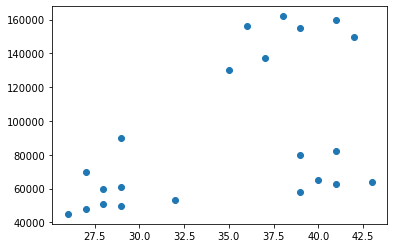

In [3]:
plt.scatter(income_df['Age'], income_df['Income($)'])
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
km_model = KMeans(n_clusters=3)
y_predicted = km_model.fit_predict(income_df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
# km_model.score(income_df['Age'], km_model['Income($)'])

In [7]:
income_df['Cluster'] = y_predicted
income_df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
df0 = income_df[income_df['Cluster']==0]
df1 = income_df[income_df['Cluster']==1]
df2 = income_df[income_df['Cluster']==2]

In [10]:
df1

,Name,Age,Income($),Cluster
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1
10,Donald,37,137000,1


In [11]:
scalar = MinMaxScaler()

In [12]:
income_df['Age'] = scalar.fit_transform(income_df[['Age']])
income_df['Income($)'] = scalar.fit_transform(income_df[['Income($)']])
income_df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [70]:
km_model = KMeans(n_clusters=3)
y_predicted = km_model.fit_predict(income_df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [71]:
income_df['Cluster'] = y_predicted
income_df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [72]:
centroids = km_model.cluster_centers_
print(centroids)

[[0.1372549  0.11633428]
 [0.72268908 0.8974359 ]
 [0.85294118 0.2022792 ]]


In [16]:
df0 = income_df[income_df['Cluster']==0]
df1 = income_df[income_df['Cluster']==1]
df2 = income_df[income_df['Cluster']==2]


In [17]:
# km_model = KMeans(n_clusters=4)
# y_predicted = km_model.fit_predict(income_df[['Age','Income($)']])
# y_predicted

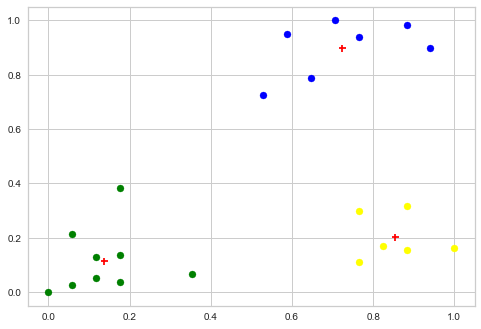

In [93]:
plt.scatter(df0['Age'], df0['Income($)'],color='green',label='Cluster 1')
plt.scatter(df1['Age'], df1['Income($)'],color='blue', label='Cluster 2')
plt.scatter(df2['Age'], df2['Income($)'],color='yellow', label='Cluster 3')

plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='red', label='centroid')
plt.show()

In [69]:
income_df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


# Getbest K value

In [67]:
from yellowbrick.cluster import KElbowVisualizer

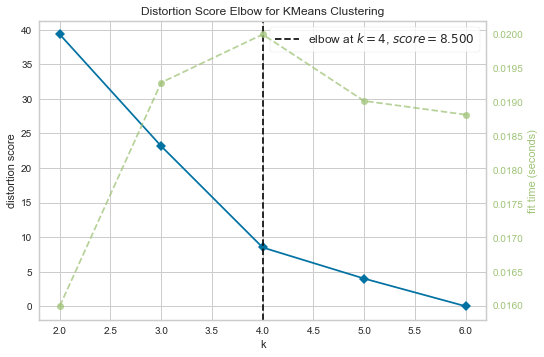

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
visualizer = KElbowVisualizer(km_model, k=(6))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [21]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km_model = KMeans(n_clusters=k)
    km_model.fit(income_df[['Age','Income($)']])
    sse.append(km_model.inertia_)

sse


C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.21055478995472493,
 0.17978846893206762,
 0.1378854859764569,
 0.10383752586603562]

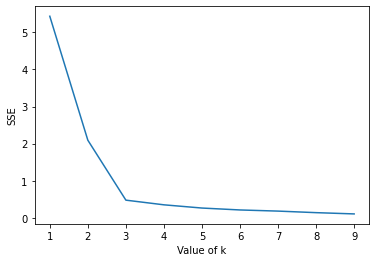

In [22]:
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.plot(k_rng, sse)

# Wines Classification

In [6]:
customers = pd.read_csv('data/Wine.csv')
customers.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [89]:
customers['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [44]:
customers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

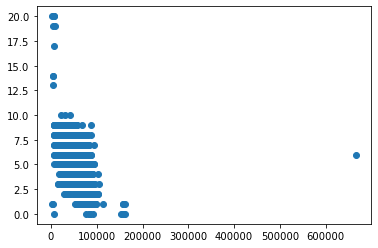

In [64]:
plt.scatter(customers.Income, customers.NumWebVisitsMonth)
plt.show()

In [91]:
# customers.corr()